In [53]:
# Importing the required libraries

import numpy as np   #Used for numerical operations, especially arrays, and efficient mathematical computations.
import pandas as pd  #Provides data structures like DataFrames for easy data manipulation and analysis., data loading(csv loading)
import matplotlib.pyplot as plt    # for static and animated visualizations in Python.
import seaborn as sns        #Built on top of Matplotlib - creating aesthetically pleasing and informative statistical graphics.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler   
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stat  #Offers statistical functions for analysis
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score #: Evaluates models using cross-validation to ensure robustness.
import warnings                        
warnings.filterwarnings('ignore') 

In [106]:
# Reading the dataset

df = pd.read_csv('med-insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [55]:
print('Shape of data {}'.format(df.shape))

Shape of data (1338, 7)


# Univariate Analysis

In [56]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [57]:
# Creating Weight status column for easy visualization.

df['weight_status']=['Underweight' if x<18.5 else 'Healthy' if x>18.5 and x<25 else 'Overweight' if x>25 and x<30 
                     else 'Obese' for x in df['bmi']]

In [58]:
# Creating age interval column for easy visualization.

df['age_']=df['age'].replace((np.arange(18,30),np.arange(30,70)),('18-30','30-70'))

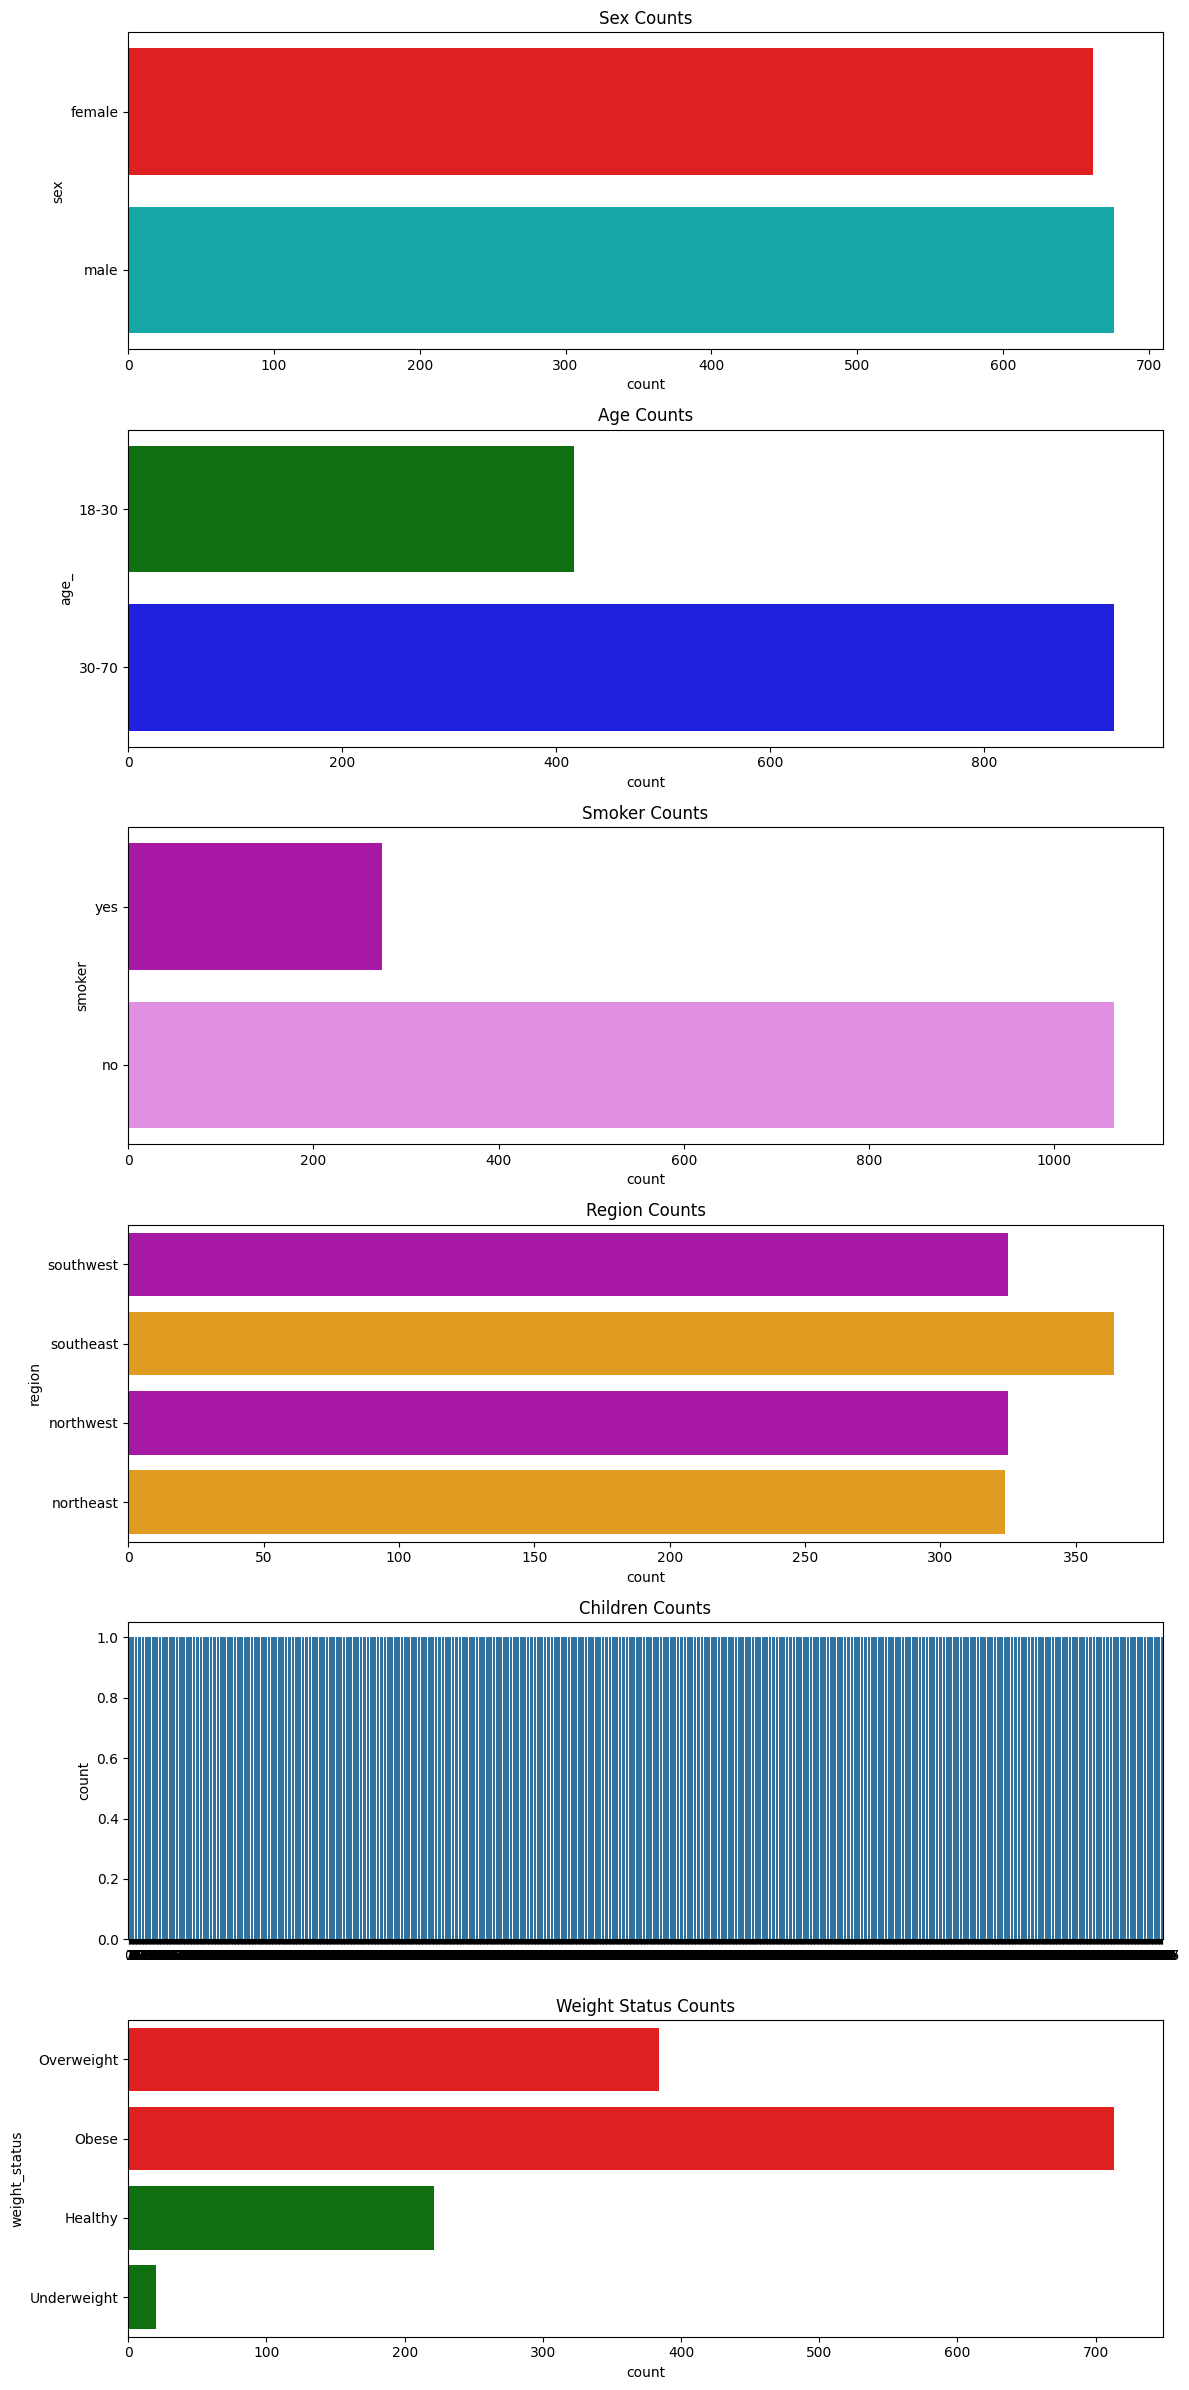

In [59]:
plt.figure(figsize=(12, 24))

# First plot: Sex Counts
plt.subplot(611)
sns.countplot(df['sex'], palette=['r', 'c'])
plt.title('Sex Counts')

# Second plot: Age Counts
plt.subplot(612)
sns.countplot(df['age_'], palette=['g', 'b'])
plt.title('Age Counts')

# Third plot: Smoker Counts
plt.subplot(613)
sns.countplot(df['smoker'], palette=['m', 'violet'])
plt.title('Smoker Counts')

# Fourth plot: Region Counts
plt.subplot(614)
sns.countplot(df['region'], palette=['m', 'orange'])
plt.title('Region Counts')

# Fifth plot: Children Counts
plt.subplot(615)
sns.countplot(df['children'])
plt.title('Children Counts')

# Sixth plot: Weight Status Counts
plt.subplot(616)
sns.countplot(df['weight_status'],palette=['red', 'red','green','green'])
plt.title('Weight Status Counts')

# Display the plots
plt.tight_layout()
plt.show()


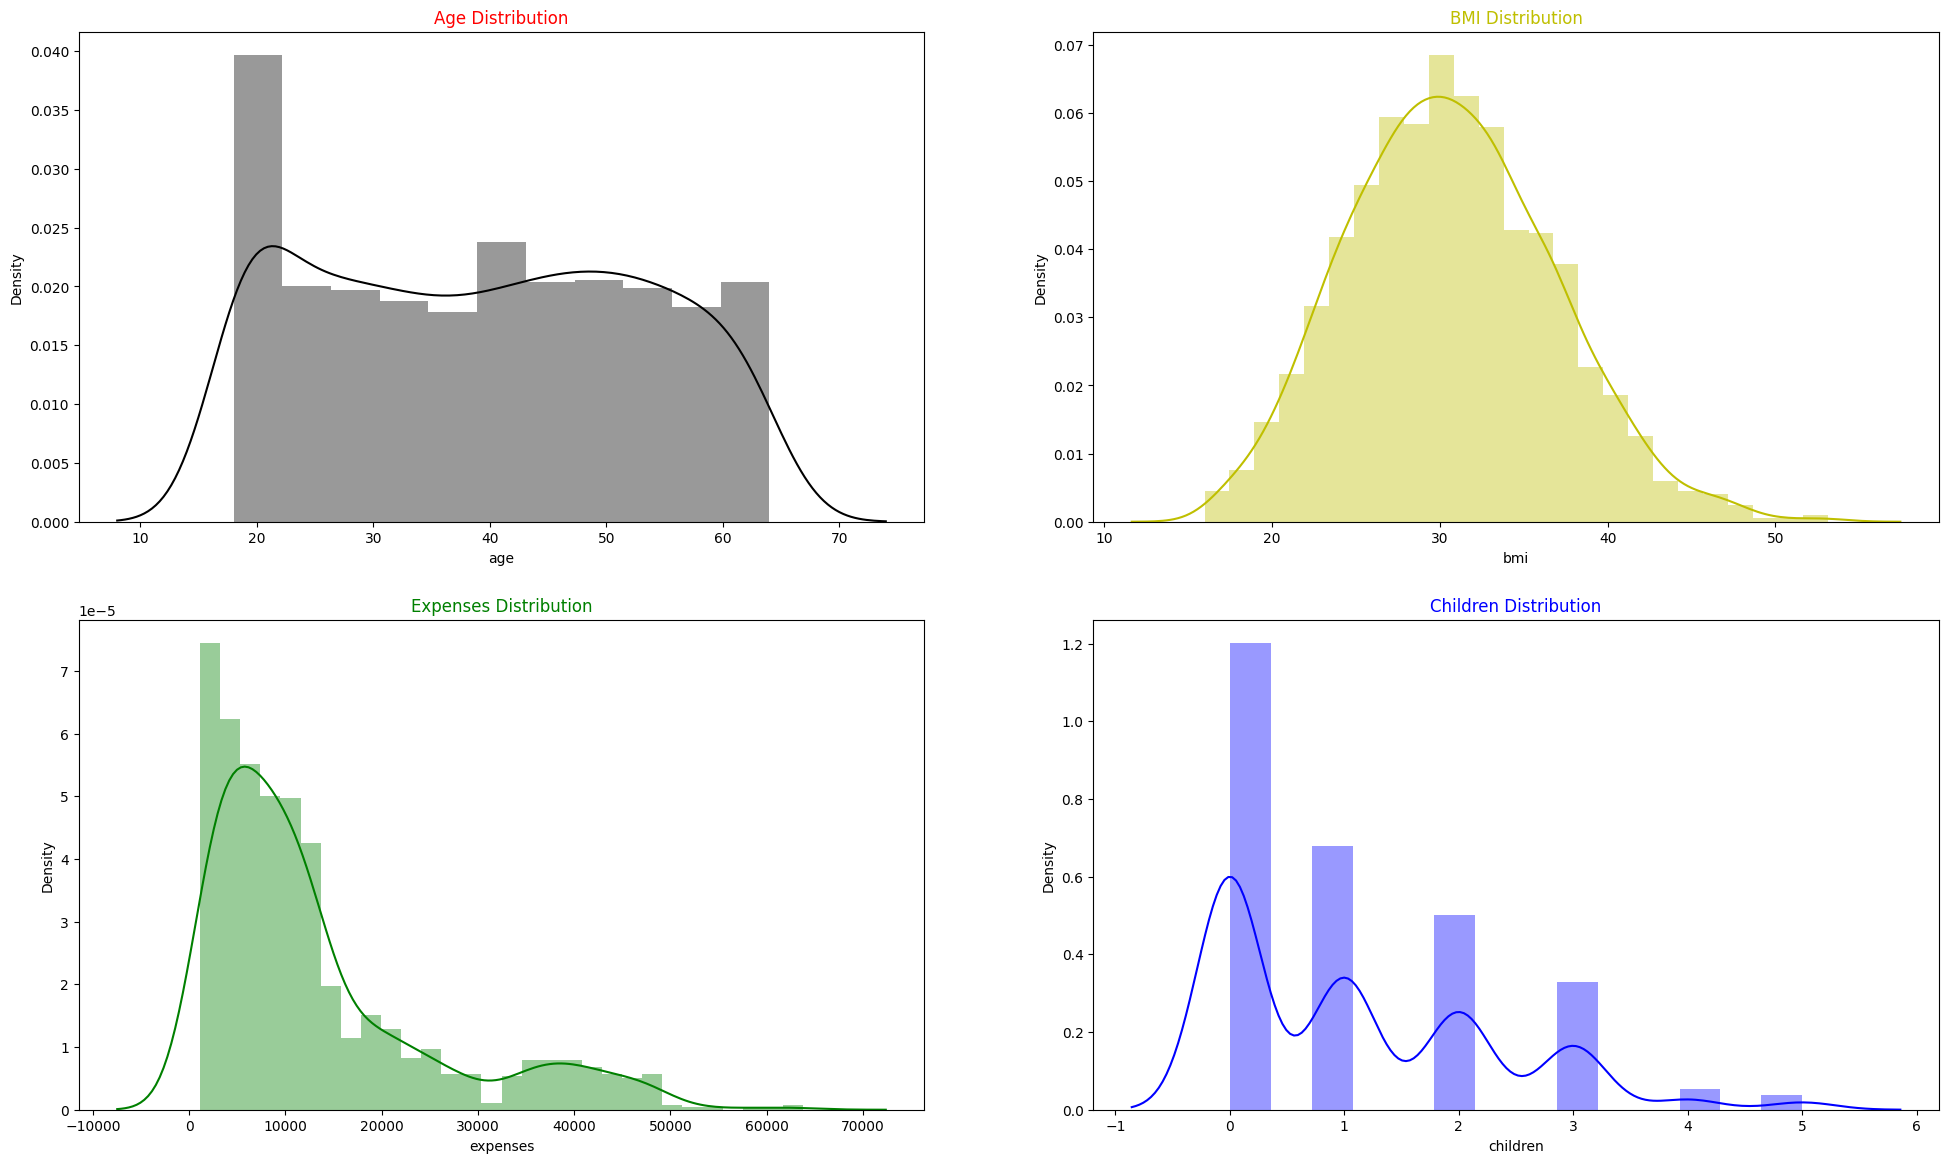

In [60]:
# Distribution of columns

plt.figure(figsize=(24,14))
plt.subplot(221)
sns.distplot(df['age'],color='black')
plt.title('Age Distribution',color='r')

plt.subplot(222)
sns.distplot(df['bmi'],color='y')
plt.title('BMI Distribution',color='y')

plt.subplot(223)
sns.distplot(df['expenses'],color='g')
plt.title('Expenses Distribution',color='g')

plt.subplot(224)
sns.distplot(df['children'],color='b')
plt.title('Children Distribution',color='b')
plt.show()

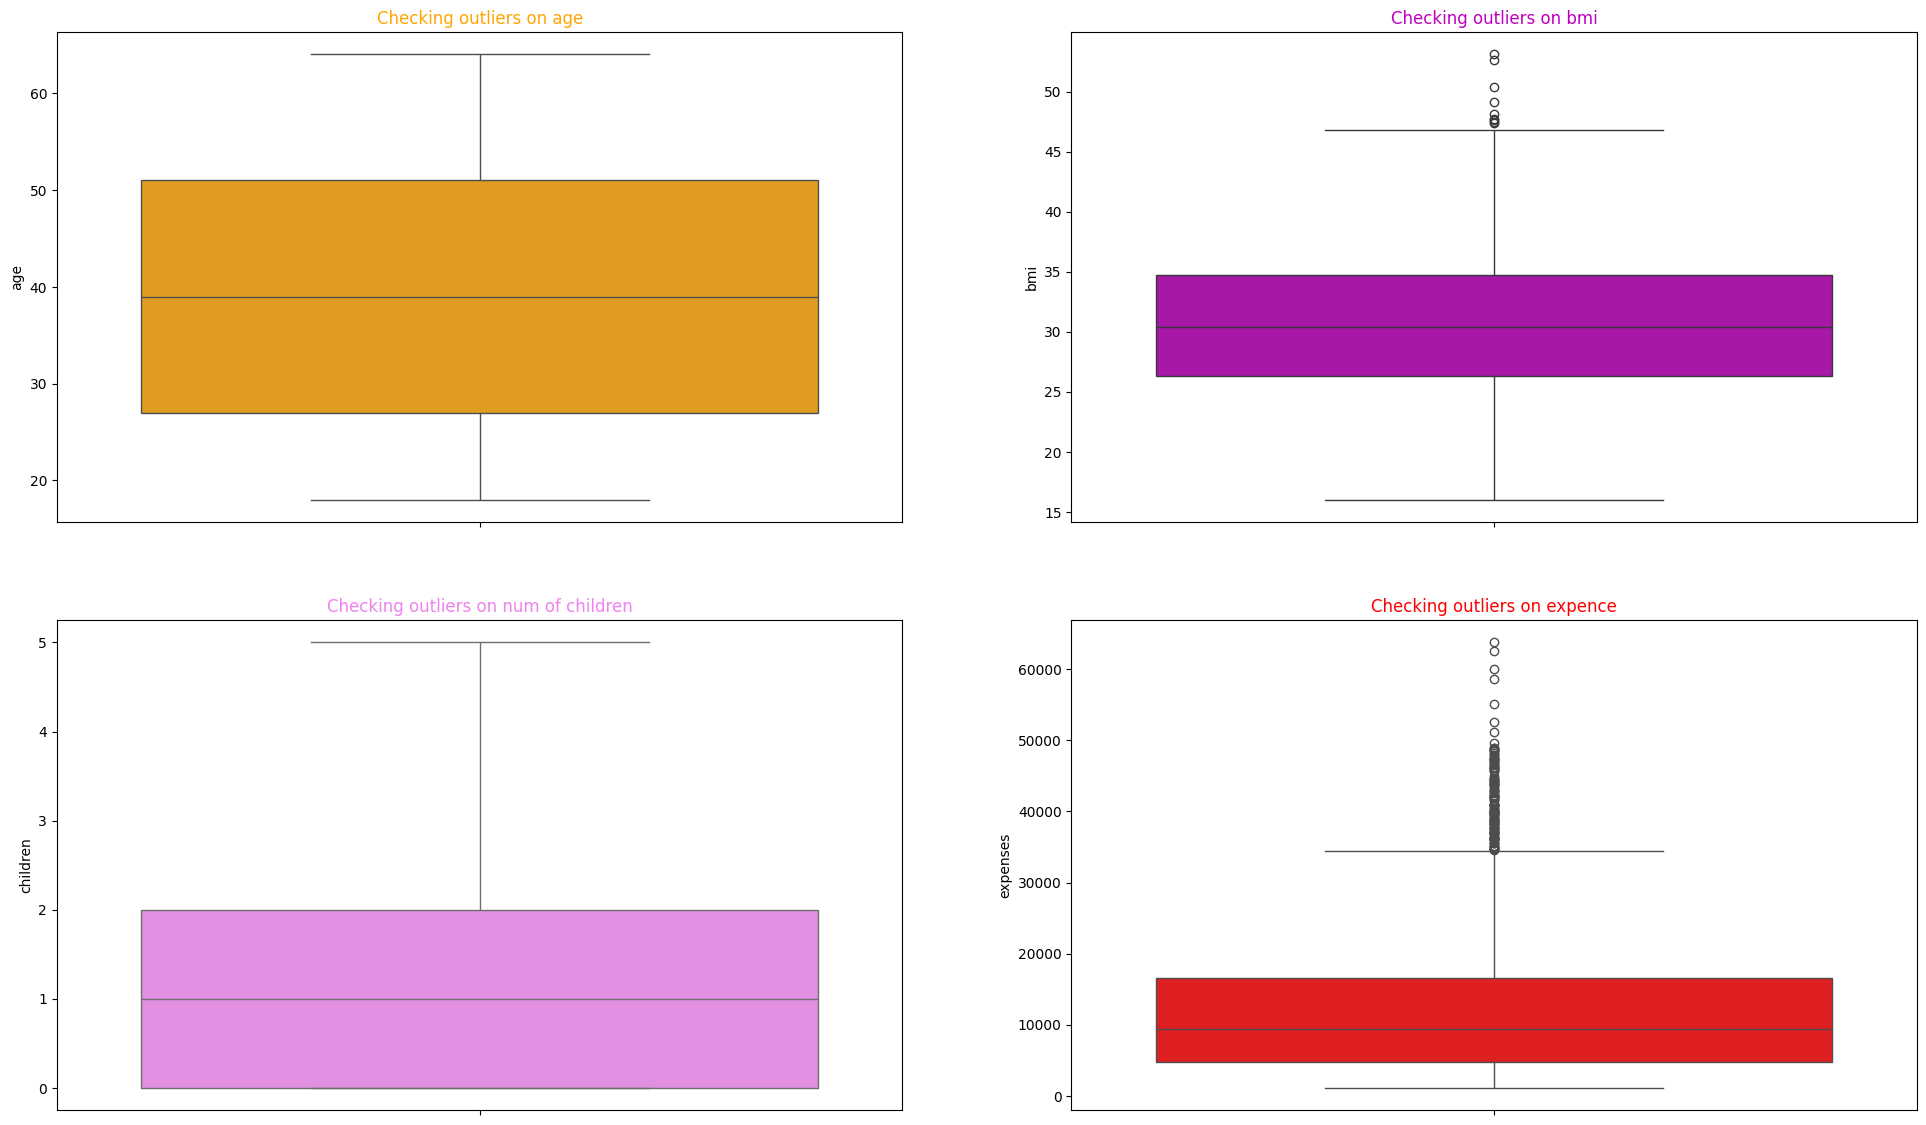

In [61]:
# Checking outliers

plt.figure(figsize=(24,14))
plt.subplot(221)
sns.boxplot(df['age'],color='orange')
plt.title('Checking outliers on age',color='orange')

plt.subplot(222)
sns.boxplot(df['bmi'],color='m')
plt.title('Checking outliers on bmi',color='m')

plt.subplot(223)
sns.boxplot(df['children'],color='violet')
plt.title('Checking outliers on num of children',color='violet')

plt.subplot(224)
sns.boxplot(df['expenses'],color='r')
plt.title('Checking outliers on expence',color='r')
plt.show()

# Bivariate Analysis

In [62]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,weight_status,age_
0,19,female,27.9,0,yes,southwest,16884.92,Overweight,18-30
1,18,male,33.8,1,no,southeast,1725.55,Obese,18-30
2,28,male,33.0,3,no,southeast,4449.46,Obese,18-30
3,33,male,22.7,0,no,northwest,21984.47,Healthy,30-70
4,32,male,28.9,0,no,northwest,3866.86,Overweight,30-70


In [63]:
# Creating expence range column for easy visualization.

df['expence_range']=['1,000 - 10,000' if x<=10000 else '10,001 - 20,000' if x>10000 and x<=20000 
                     else '20,001 - 30,000' if x>20000 and x<=30000 else '30,001 - 40,000' if x>30000 and x<=40000 
                    else '40,001 - 50,000' if x>40000 and x<=50000 else '50,000 +' 
                    for x in df['expenses']]

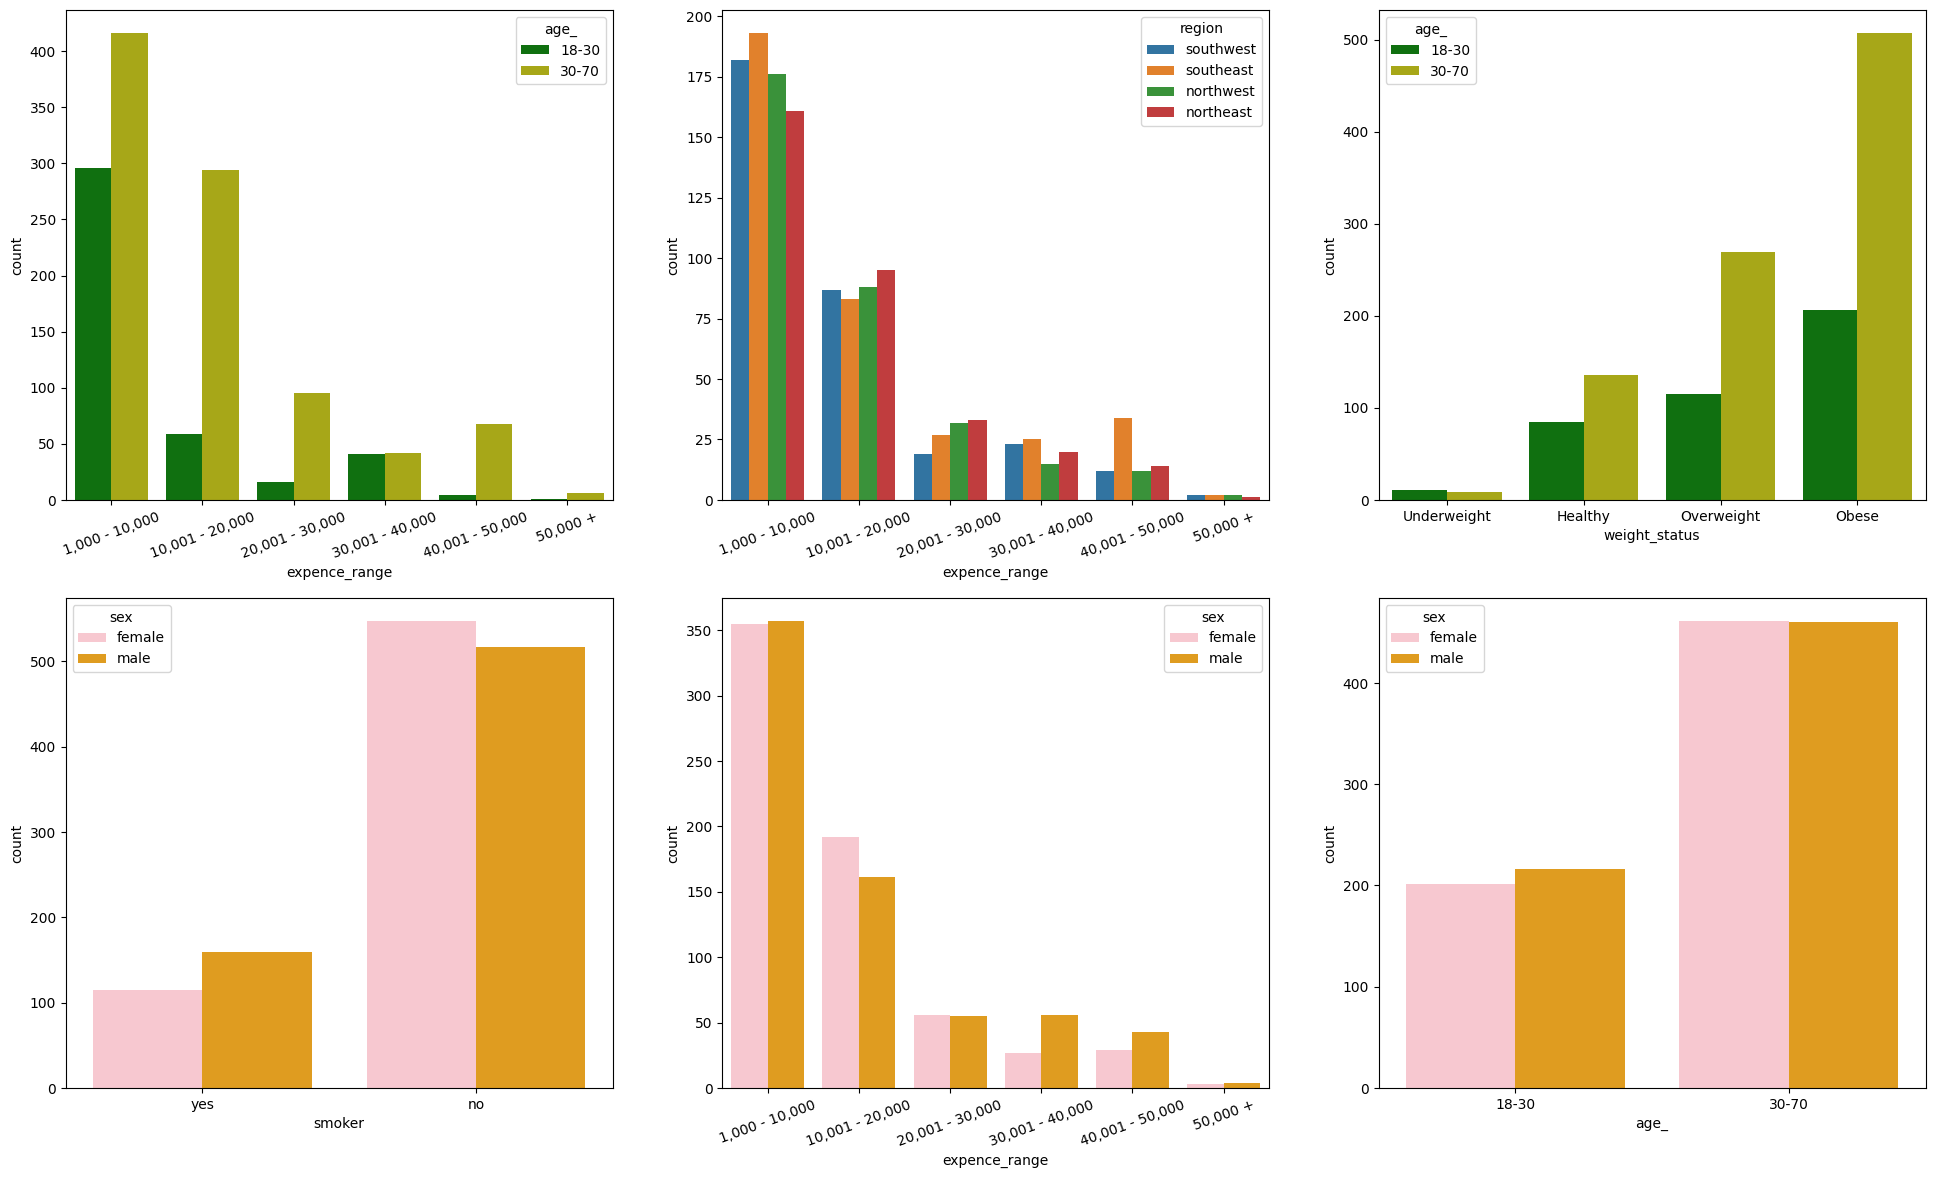

In [64]:
plt.figure(figsize=(24,14))

# Subplot 1: Expense Range vs Age Group
plt.subplot(231)
sns.countplot(x='expence_range', hue='age_', data=df, order=['1,000 - 10,000','10,001 - 20,000','20,001 - 30,000','30,001 - 40,000', '40,001 - 50,000','50,000 +'], palette=['g','y'])
plt.xticks(rotation=20)

# Subplot 2: Expense Range vs Region
plt.subplot(232)
sns.countplot(x='expence_range', hue='region', data=df, order=['1,000 - 10,000','10,001 - 20,000','20,001 - 30,000','30,001 - 40,000', '40,001 - 50,000','50,000 +'])
plt.xticks(rotation=20)

# Subplot 3: Weight Status vs Age Group
plt.subplot(233)
sns.countplot(x='weight_status', hue='age_', data=df, order=['Underweight','Healthy','Overweight','Obese'], palette=['g','y'])

# Subplot 4: Smoker vs Sex
plt.subplot(234)
sns.countplot(x='smoker', hue='sex', data=df, palette=['pink','orange'])

# Subplot 5: Expense Range vs Sex
plt.subplot(235)
sns.countplot(x='expence_range', hue='sex', data=df, order=['1,000 - 10,000','10,001 - 20,000','20,001 - 30,000','30,001 - 40,000', '40,001 - 50,000','50,000 +'], palette=['pink','orange'])
plt.xticks(rotation=20)

# Subplot 6: Age Group vs Sex
plt.subplot(236)
sns.countplot(x='age_', hue='sex', data=df, palette=['pink','orange'])

plt.show()


# Multivariate Analysis

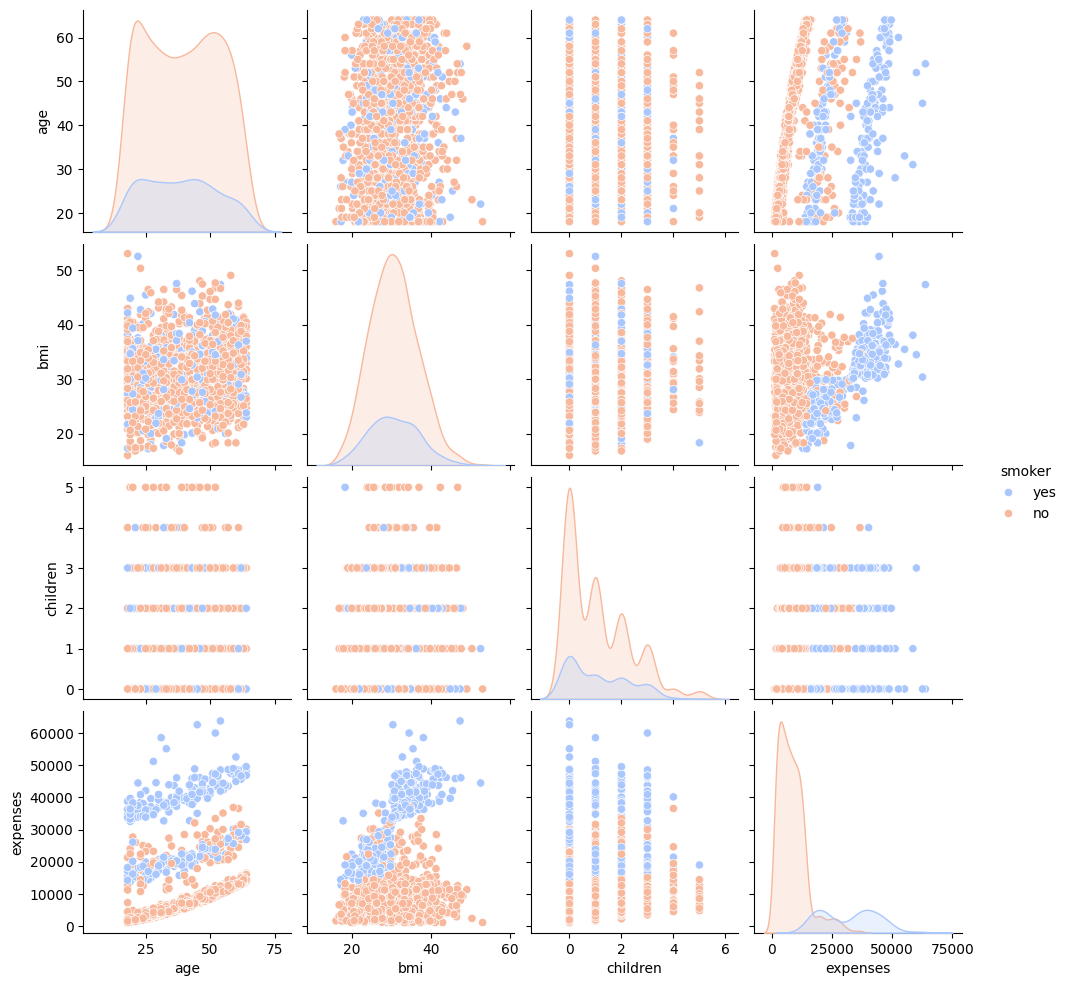

In [108]:
# Create a pairplot with hue set to a categorical column (e.g., 'smoker')
sns.pairplot(df, hue='smoker', diag_kind='kde', palette='coolwarm')
plt.show()


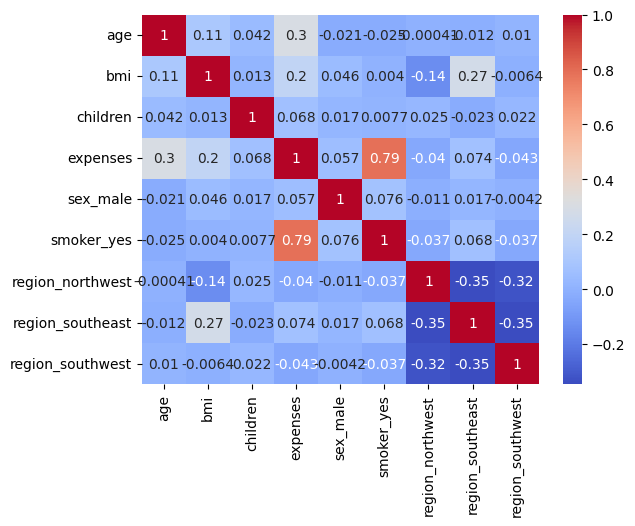

In [109]:
# Convert categorical columns to numeric using one-hot encoding
encoded_df = pd.get_dummies(df, drop_first=True)

# Plot the correlation matrix
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm')
plt.show()


# Feature Engineering

In [67]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,weight_status,age_,expence_range
0,19,female,27.9,0,yes,southwest,16884.92,Overweight,18-30,"10,001 - 20,000"
1,18,male,33.8,1,no,southeast,1725.55,Obese,18-30,"1,000 - 10,000"
2,28,male,33.0,3,no,southeast,4449.46,Obese,18-30,"1,000 - 10,000"
3,33,male,22.7,0,no,northwest,21984.47,Healthy,30-70,"20,001 - 30,000"
4,32,male,28.9,0,no,northwest,3866.86,Overweight,30-70,"1,000 - 10,000"


In [68]:
df.drop(['age_','expence_range','weight_status'],axis=1,inplace=True)

# Data Processing

In [69]:
df.select_dtypes('object').head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [70]:
# Converting object to int

df['sex']=df['sex'].replace(('male','female'),(2,1))
df['smoker']=df['smoker'].replace(('yes','no'),(2,1))
df['region']=df['sex'].replace(('northeast','northwest','southwest','southeast'),(1,2,3,4))

In [71]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,2,1,16884.92
1,18,2,33.8,1,1,2,1725.55
2,28,2,33.0,3,1,2,4449.46
3,33,2,22.7,0,1,2,21984.47
4,32,2,28.9,0,1,2,3866.86


In [72]:
x = df.drop(['expenses'],axis=1)
y = df['expenses']

In [73]:
print('Shape of x data {}'.format(x.shape))
print('Shape of y data {}'.format(y.shape))

Shape of x data (1338, 6)
Shape of y data (1338,)


In [74]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)

In [75]:
print('Shape of xtrain {}'.format(xtrain.shape))
print('Shape of xtest {}'.format(xtest.shape))
print('Shape of ytrain {}'.format(ytrain.shape))
print('Shape of ytest {}'.format(ytest.shape))

Shape of xtrain (1070, 6)
Shape of xtest (268, 6)
Shape of ytrain (1070,)
Shape of ytest (268,)


In [76]:
# Data Normalization(so that every feature is treated equally)

st=StandardScaler()
xtrain_scaled=st.fit_transform(xtrain)
xtest_scaled=st.transform(xtest)

# Machine Learning models

In [77]:
def linear_reg(xtrain_scaled,xtest_scaled,ytrain,ytest):
    lr=LinearRegression()
    lr.fit(xtrain_scaled,ytrain)
    ypred=lr.predict(xtest_scaled)
    score=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print('***Linear Regression model***')
    print('Score for Linear Regression model is {}'.format(score))
    print('RMSE for Linear Regression model is {}'.format(rmse))

In [78]:
def random_forest_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest):
    rf=RandomForestRegressor()
    rf.fit(xtrain_scaled,ytrain)
    ypred=(rf.predict(xtest_scaled))
    score=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print('***Random Forest Regressor Model***')
    print('Score for Random Forest Regressor Model is {}'.format(score))
    print('RMSE for Random Forest Regressor Model is {}'.format(rmse))
    return rf

In [79]:
def gradient_boosting_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest):
    gb=GradientBoostingRegressor()
    gb.fit(xtrain_scaled,ytrain)
    ypred=(gb.predict(xtest_scaled))
    score=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print('***Gradient Boosting Regressor Model***')
    print('Score for Gradient Boosting Regressor Model is {}'.format(score))
    print('RMSE for Gradient Boosting Regressor Model is {}'.format(rmse))
    return gb

In [80]:
def model_compare(xtrain_scaled,xtest_scaled,ytrain,ytest):
    linear_reg(xtrain_scaled,xtest_scaled,ytrain,ytest)
    print('-'*100)
    random_forest_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest)
    print('-'*100)
    gradient_boosting_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest)
    print('-'*100)

In [81]:
model_compare(xtrain_scaled,xtest_scaled,ytrain,ytest)

***Linear Regression model***
Score for Linear Regression model is 0.6931491538324287
RMSE for Linear Regression model is 6560.18633907841
----------------------------------------------------------------------------------------------------
***Random Forest Regressor Model***
Score for Random Forest Regressor Model is 0.8009726156329955
RMSE for Random Forest Regressor Model is 5283.344510781449
----------------------------------------------------------------------------------------------------
***Gradient Boosting Regressor Model***
Score for Gradient Boosting Regressor Model is 0.824055992516709
RMSE for Gradient Boosting Regressor Model is 4967.521468610041
----------------------------------------------------------------------------------------------------


R^2 (square) :- Indicates the proportion of variance explained by the model(higher is better).          
(Score)->  R^2  = 1 - {SS(res)/SS(tot)}         
SS(res) : Sum of squared residuals (errors).             
SS(tot) : Total sum of squares (variance of the actual values).  

RMSE : root mean square error : Indicates the average magnitude of errors (lower is better.)


In [82]:
# From the above models Gradient boosting regressor model is best
# Cross validation on Gradient boosting regressor

gb=GradientBoostingRegressor()
gb.fit(xtrain_scaled,ytrain)
ypred=(gb.predict(xtest_scaled))
score=r2_score(ytest,ypred)
print('Score for Gradient Boosting Regressor Model is {}'.format(score))

scores=cross_val_score(gb,x,y,cv=5)
print(scores)
print(np.mean(scores))

Score for Gradient Boosting Regressor Model is 0.8224511716299436
[0.8781405  0.79618138 0.8895667  0.84708185 0.85860712]
0.853915511166352


# Model Improvement

In [83]:
# Gaussian transformation(normal distribution)

def transform(data):
    plt.figure(figsize=(16,6))
    plt.subplot(121)
    sns.distplot(data)
    plt.subplot(122)
    stat.probplot(data,plot=plt)

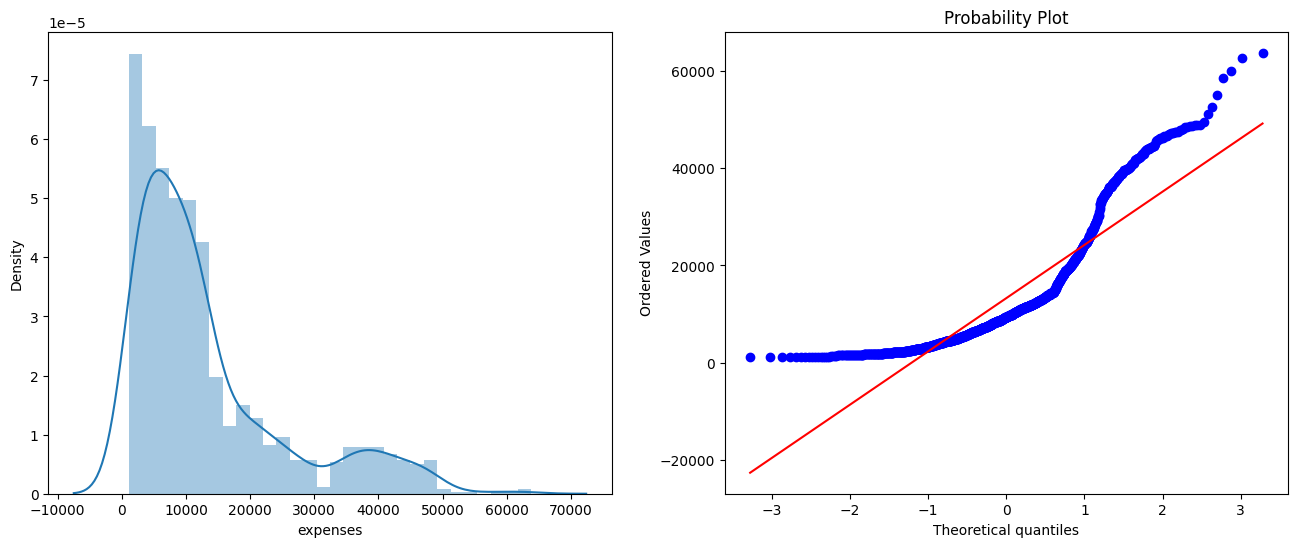

In [84]:
transform(y)

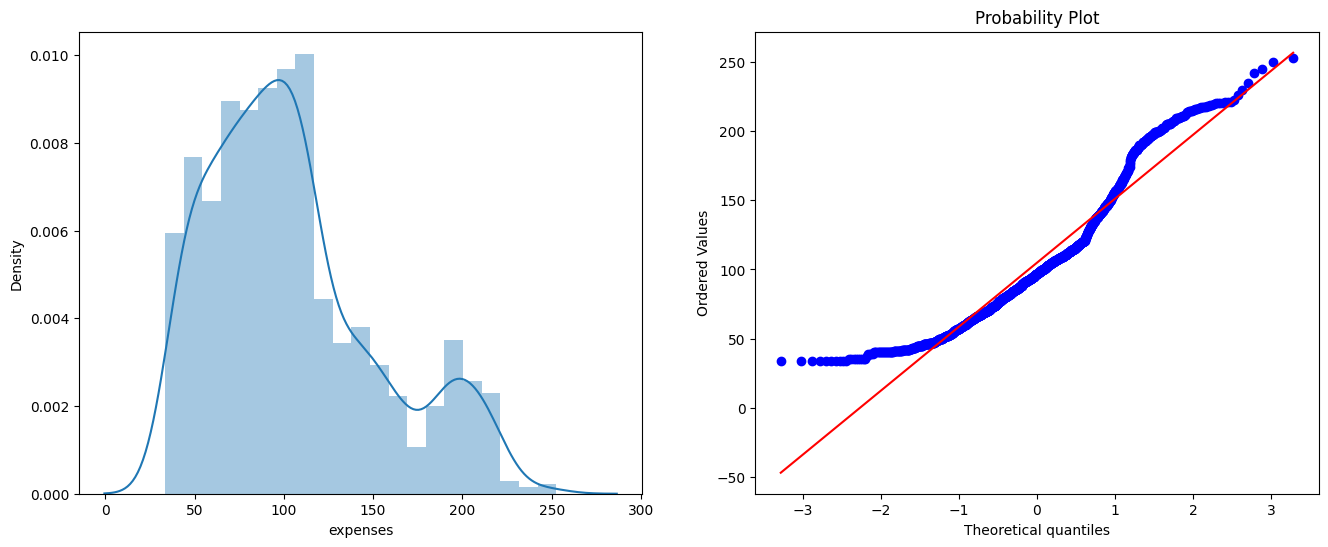

In [85]:
transform(np.sqrt(y))

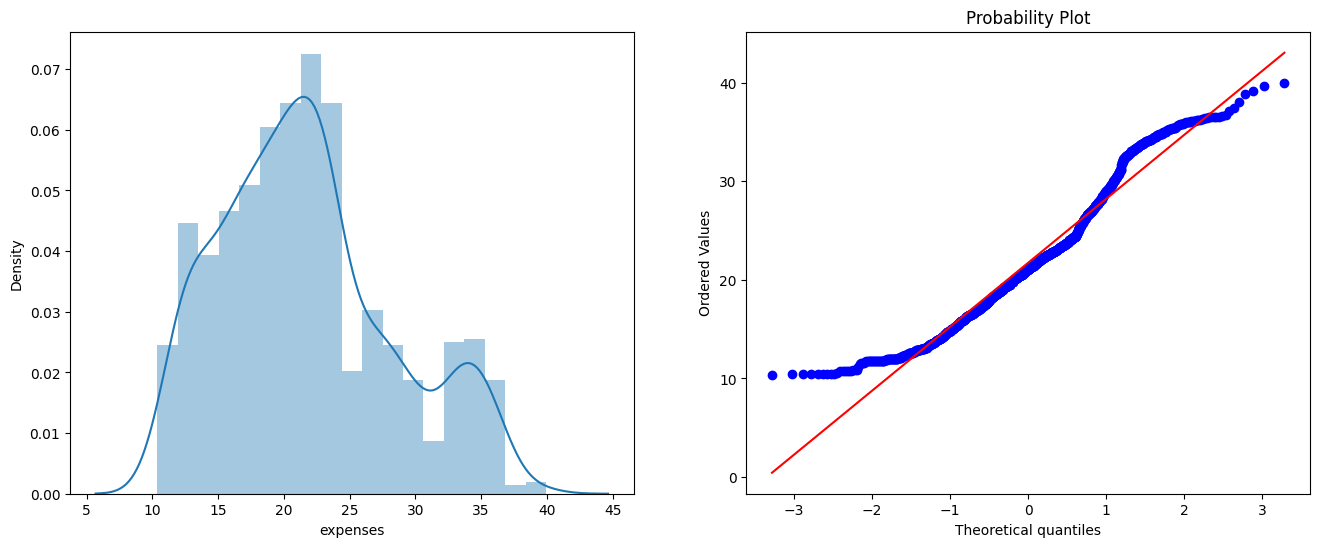

In [86]:
transform(np.cbrt(y))

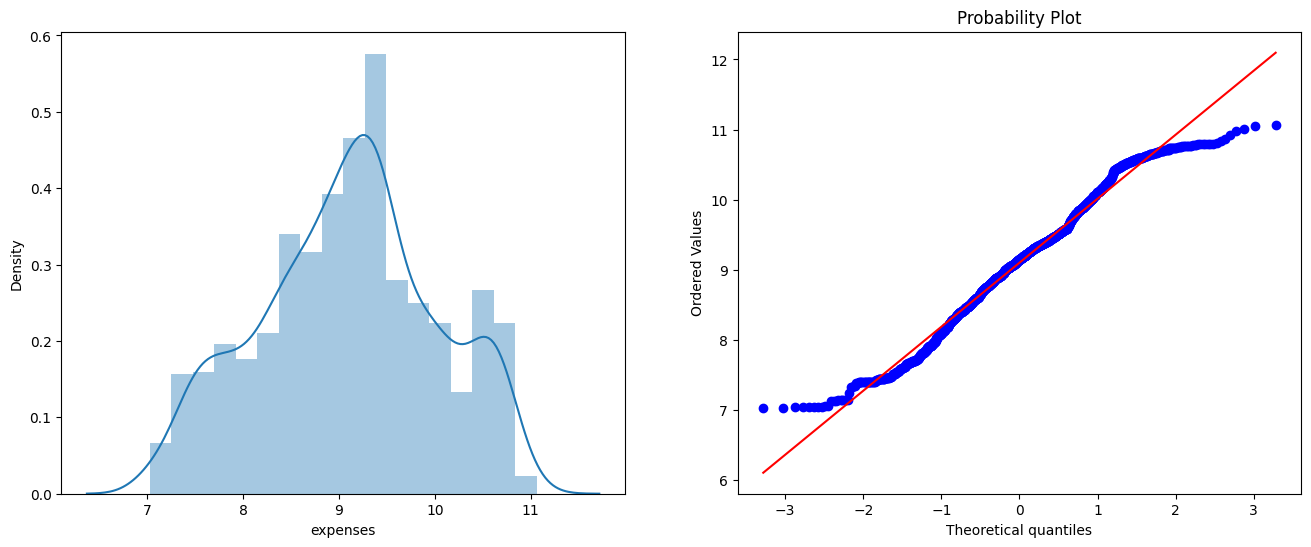

In [87]:
transform(np.log(y))

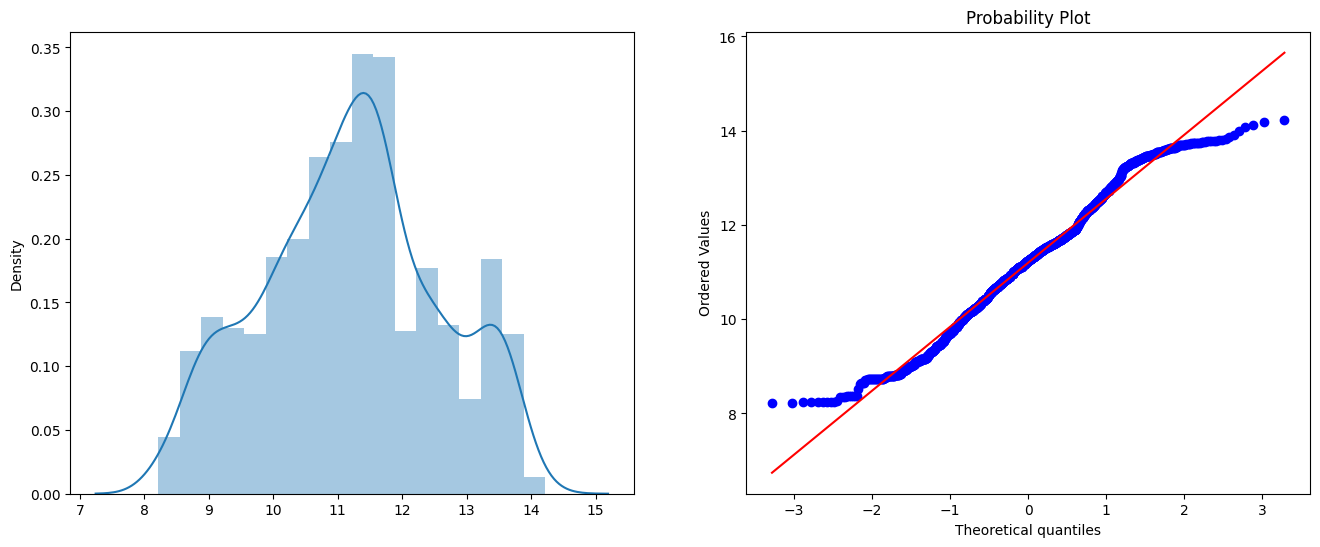

In [88]:
boxcox,params=stat.boxcox(y) 
transform(boxcox)
#Box-Cox Transformation: It applies a power transformation to make data more Gaussian-like.
# The transformation is parameterized by a lambda value (params)

In [89]:
# From the above log transformation is best
ytrain_log=np.log(ytrain)
ytest_log=np.log(ytest)

In [90]:
model_compare(xtrain_scaled,xtest_scaled,ytrain_log,ytest_log)

***Linear Regression model***
Score for Linear Regression model is 0.6979047012825492
RMSE for Linear Regression model is 0.4940303009131069
----------------------------------------------------------------------------------------------------
***Random Forest Regressor Model***
Score for Random Forest Regressor Model is 0.7428867404579003
RMSE for Random Forest Regressor Model is 0.4557680114631473
----------------------------------------------------------------------------------------------------
***Gradient Boosting Regressor Model***
Score for Gradient Boosting Regressor Model is 0.7811771138379029
RMSE for Gradient Boosting Regressor Model is 0.420463183664189
----------------------------------------------------------------------------------------------------


In [91]:
# From the above models Gradient boosting regressor model is best
# Cross validation on Gradient boosting regressor

gb2=GradientBoostingRegressor()
gb2.fit(xtrain_scaled,ytrain_log)
ypred=(gb2.predict(xtest_scaled))
scorer2=r2_score(ytest_log,ypred)
print('Score for Gradient Boosting Regressor Model is {}'.format(scorer2))

scores2=cross_val_score(gb2,x,y,cv=5)
print(scores2)
print(np.mean(scores2))

Score for Gradient Boosting Regressor Model is 0.781096814730588
[0.87808916 0.79710183 0.8895667  0.84733456 0.8581931 ]
0.8540570705397611


In [92]:
print('The best score is from gradient boosting algorithm ie:  {}'.format(np.mean(scores2)))

The best score is from gradient boosting algorithm ie:  0.8540570705397611


In [93]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [94]:
def predict_medical_cost(model):
    age = int(input("Enter age: "))
    sex = input("Enter sex (male/female): ")
    bmi = float(input("Enter BMI: "))
    children = int(input("Enter number of children: "))
    smoker = input("Are you a smoker? (yes/no): ")
    region = input("Enter region: ")

    # Convert categorical features
    sex = 1 if sex == 'male' else 0
    smoker = 1 if smoker == 'yes' else 0
    
    # Assume that 'region' is already encoded in your model
    # Feature order should match training data
    features = [[age, sex, bmi, children, smoker, region]]
    
    # Scale the features if scaling was done
    features_scaled = scaler.transform(features)
    
    # Predict using the trained model
    predicted_cost = model.predict(features_scaled)
    print(f'Predicted medical cost: {predicted_cost[0]}')

In [95]:
def predict_medical_cost(model, scaler, age, sex, bmi, children, smoker, region):
    # Convert categorical features
    sex = 1 if sex == 'male' else 0
    smoker = 1 if smoker == 'yes' else 0

    # Create feature array (order should match your training data)
    features = [[age, sex, bmi, children, smoker, region]]

    # Scale the features using the previously fitted scaler
    features_scaled = scaler.transform(features)

    # Predict using the trained model
    predicted_cost = model.predict(features_scaled) *2    # conversion factor 2 "general recommendations from financial planning firms and experts who emphasize the importance of having an emergency fund"
    print(f'Predicted medical cost: {predicted_cost[0]}') 
    
    
    # Suggesting insurance based on predicted costs
    if 0 <= predicted_cost < 10000:
        insurance = [
            "\nOPD Consultations & Pharmacy Cover (0-10K) - ICICI Lombard\n"
            "Daycare Procedure Claim (0-10K) - HDFC ERGO\n"
            "Health Checkup Plan (0-10K) - Star Health\n"
        ]
    elif 10000 <= predicted_cost < 20000:
        insurance = [
            "\nMinor Surgery Claim (10K-20K) - Religare Health Insurance\n"
            "Basic Hospitalization Cover (10K-20K) - Max Bupa\n"
            "Lab Test Cover (10K-20K) - ICICI Lombard\n"
        ]
    elif 20000 <= predicted_cost < 30000:
        insurance = [
            "\nDiagnostic Tests & Surgery Claim (20K-30K) - ICICI Lombard\n"
            "Hospitalization for Medium Procedures (20K-30K) - HDFC ERGO\n"
            "Accident Coverage (20K-30K) - SBI Health Insurance\n"
        ]
    elif 30000 <= predicted_cost < 40000:
        insurance = [
            "\nSurgical Cover (30K-40K) - Star Health\n"
            "Medium-Term Hospitalization (30K-40K) - New India Assurance\n"
            "Advanced Diagnostic Tests (30K-40K) - Religare Health\n"
        ]
    elif 40000 <= predicted_cost < 50000:
        insurance = [
            "\nMajor Surgery Claim (40K-50K) - Religare Health Insurance\n"
            "Comprehensive Hospitalization (40K-50K) - Max Bupa\n"
            "Advanced Surgical Cover (40K-50K) - ICICI Lombard\n"
        ]
    elif 50000 <= predicted_cost < 60000:
        insurance = [
            "\nHigh-End Surgery Claim (50K-60K) - HDFC ERGO\n"
            "Full Hospitalization Coverage (50K-60K) - Tata AIG\n"
            "Critical Illness Coverage (50K-60K) - SBI Health\n"
        ]
    elif 60000 <= predicted_cost < 70000:
        insurance = [
            "\nCritical Illness and Surgery (60K-70K) - ICICI Lombard\n"
            "Premium Hospitalization Cover (60K-70K) - Religare Health\n"
        ]
    else:
        insurance = ["No specific insurance suggested for this range."]

    print(f'Suggested insurance schemes: {", ".join(insurance)}')

# Example 
predict_medical_cost(model=gb, scaler=scaler, age=30, sex='male', bmi=25.0, children=1, smoker='no', region=2)

Predicted medical cost: 9780.537173680925
Suggested insurance schemes: 
OPD Consultations & Pharmacy Cover (0-10K) - ICICI Lombard
Daycare Procedure Claim (0-10K) - HDFC ERGO
Health Checkup Plan (0-10K) - Star Health



In [96]:
predict_medical_cost(model=gb, scaler=scaler, age=22, sex='female', bmi=35.0, children=1, smoker='yes', region=2)
predict_medical_cost(model=gb, scaler=scaler, age=67, sex='female', bmi=15.0, children=1, smoker='yes', region=2)
predict_medical_cost(model=gb, scaler=scaler, age=39, sex='male', bmi=29.0, children=1, smoker='yes', region=2)

Predicted medical cost: 8299.70159522551
Suggested insurance schemes: 
OPD Consultations & Pharmacy Cover (0-10K) - ICICI Lombard
Daycare Procedure Claim (0-10K) - HDFC ERGO
Health Checkup Plan (0-10K) - Star Health

Predicted medical cost: 35822.27109994318
Suggested insurance schemes: 
Surgical Cover (30K-40K) - Star Health
Medium-Term Hospitalization (30K-40K) - New India Assurance
Advanced Diagnostic Tests (30K-40K) - Religare Health

Predicted medical cost: 14968.597466205756
Suggested insurance schemes: 
Minor Surgery Claim (10K-20K) - Religare Health Insurance
Basic Hospitalization Cover (10K-20K) - Max Bupa
Lab Test Cover (10K-20K) - ICICI Lombard



In [97]:
predict_medical_cost(model=gb, scaler=scaler, age=81, sex='female', bmi=32.1, children=5, smoker='yes', region=1)

Predicted medical cost: 61749.96680274516
Suggested insurance schemes: 
Critical Illness and Surgery (60K-70K) - ICICI Lombard
Premium Hospitalization Cover (60K-70K) - Religare Health



In [98]:
predict_medical_cost(model=gb, scaler=scaler, age=32, sex='male', bmi=24, children=2, smoker='yes', region=1)

Predicted medical cost: 12567.594484416388
Suggested insurance schemes: 
Minor Surgery Claim (10K-20K) - Religare Health Insurance
Basic Hospitalization Cover (10K-20K) - Max Bupa
Lab Test Cover (10K-20K) - ICICI Lombard



In [99]:
predict_medical_cost(model=gb, scaler=scaler, age=7, sex='male', bmi=20, children=0, smoker='no', region=4)

Predicted medical cost: 3168.180295913778
Suggested insurance schemes: 
OPD Consultations & Pharmacy Cover (0-10K) - ICICI Lombard
Daycare Procedure Claim (0-10K) - HDFC ERGO
Health Checkup Plan (0-10K) - Star Health



In [100]:
predict_medical_cost(model=gb, scaler=scaler, age=77, sex='male', bmi=30, children=5, smoker='yes', region=4)

Predicted medical cost: 61908.53639526216
Suggested insurance schemes: 
Critical Illness and Surgery (60K-70K) - ICICI Lombard
Premium Hospitalization Cover (60K-70K) - Religare Health



In [101]:
predict_medical_cost(model=gb, scaler=scaler, age=32, sex='male', bmi=28.9, children=0, smoker='no', region=4)

Predicted medical cost: 8753.869166642553
Suggested insurance schemes: 
OPD Consultations & Pharmacy Cover (0-10K) - ICICI Lombard
Daycare Procedure Claim (0-10K) - HDFC ERGO
Health Checkup Plan (0-10K) - Star Health



In [102]:
predict_medical_cost(model=gb, scaler=scaler, age=24, sex='male', bmi=24, children=1, smoker='no', region=2)

Predicted medical cost: 10247.196531808895
Suggested insurance schemes: 
Minor Surgery Claim (10K-20K) - Religare Health Insurance
Basic Hospitalization Cover (10K-20K) - Max Bupa
Lab Test Cover (10K-20K) - ICICI Lombard



In [103]:
predict_medical_cost(model=gb, scaler=scaler, age=37, sex='female', bmi=29, children=2, smoker='yes', region=2)

Predicted medical cost: 15222.586037074128
Suggested insurance schemes: 
Minor Surgery Claim (10K-20K) - Religare Health Insurance
Basic Hospitalization Cover (10K-20K) - Max Bupa
Lab Test Cover (10K-20K) - ICICI Lombard



In [104]:
predict_medical_cost(model=gb, scaler=scaler, age=57 , sex='male', bmi=32, children=1, smoker='no', region=3)

Predicted medical cost: 27126.26456807739
Suggested insurance schemes: 
Diagnostic Tests & Surgery Claim (20K-30K) - ICICI Lombard
Hospitalization for Medium Procedures (20K-30K) - HDFC ERGO
Accident Coverage (20K-30K) - SBI Health Insurance



In [105]:
predict_medical_cost(model=gb, scaler=scaler, age=77 , sex='female', bmi=35, children=3, smoker='yes', region=3)

Predicted medical cost: 35318.719008853455
Suggested insurance schemes: 
Surgical Cover (30K-40K) - Star Health
Medium-Term Hospitalization (30K-40K) - New India Assurance
Advanced Diagnostic Tests (30K-40K) - Religare Health



In [110]:
predict_medical_cost(model=gb, scaler=scaler, age=66, sex='male', bmi=35.0, children=4, smoker='yes', region=2)

Predicted medical cost: 64362.62701567718
Suggested insurance schemes: 
Critical Illness and Surgery (60K-70K) - ICICI Lombard
Premium Hospitalization Cover (60K-70K) - Religare Health

